<a href="https://colab.research.google.com/github/AbdallaElbedwihi/Loan-default----oversampling/blob/main/Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan defaulting prediction -- Python practice





Here, i'll be performing analysis on a dataset collected frm LendingClub.com for loans from the year 2007 - 2011

In [1]:
# Upload data set
import pandas as pd
loans = pd.read_csv('/content/drive/MyDrive/Data/lending_club_loans (2007-2011 ABAV assignment).csv')


In [2]:
# Explore first 5 rows of data
loans.head()


,id,member_id,loan_amnt,funded_amnt,loan_status,int_rate,term,installment,Grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int
0,1077501,1296599,5000,5000,Fully Paid,0.1065,36 months,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0,1/1/1985,737,1,3,0,13648,0.837,9,5863.155187,5000.00,863.16
1,1077430,1314167,2500,2500,Charged Off,0.1527,60 months,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0,1/4/1999,742,5,3,0,1687,0.094,4,1008.710000,456.46,435.17
2,1077175,1313524,2400,2400,Fully Paid,0.1596,36 months,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0,1/11/2001,737,2,2,0,2956,0.985,10,3005.666844,2400.00,605.67
3,1076863,1277178,10000,10000,Fully Paid,0.1349,36 months,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,CA,20.00,0,1/2/1996,692,1,10,0,5598,0.210,37,12231.890000,10000.00,2214.92
4,1075358,1311748,3000,3000,Current,0.1269,60 months,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,OR,17.94,0,1/1/1996,697,0,15,0,27783,0.539,38,3784.490000,2729.22,1055.27


In [3]:
# Information about variables and shape of dataset
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39786 non-null  int64  
 1   member_id            39786 non-null  int64  
 2   loan_amnt            39786 non-null  int64  
 3   funded_amnt          39786 non-null  int64  
 4   loan_status          39786 non-null  object 
 5   int_rate             39786 non-null  float64
 6   term                 39786 non-null  object 
 7   installment          39786 non-null  float64
 8   Grade                39786 non-null  object 
 9   sub_grade            39786 non-null  object 
 10  emp_length           38708 non-null  object 
 11  home_ownership       39786 non-null  object 
 12  annual_inc           39786 non-null  float64
 13  verification_status  39786 non-null  object 
 14  issue_d              39786 non-null  object 
 15  pymnt_plan           39786 non-null 

Dataset size of around 40,000 observations and 32 variables. 
Interesting variables to look at for loan default prediction are "loan_status" or "Proft/Loss"

In [4]:
# Statistical deescription of continuous variables
loans.describe()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int
count,3.978600e+04,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39736.000000,39786.000000,39786.000000,39786.000000,39786.000000
mean,6.833939e+05,8.507937e+05,11231.360277,10958.722289,0.120279,324.733637,6.897907e+04,13.317794,0.146534,716.997989,0.869049,9.294023,0.055145,13391.983914,0.488581,22.090308,12216.555531,9843.236370,2275.876011
std,2.106770e+05,2.656370e+05,7464.542832,7194.076908,0.037275,208.923212,6.376263e+04,6.678300,0.491826,35.840682,1.070069,4.399997,0.237653,15894.635107,0.283366,11.401620,9139.086280,7124.237548,2631.037038
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,627.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5.163518e+05,6.670548e+05,5500.000000,5400.000000,0.092500,167.080000,4.050000e+04,8.180000,0.000000,687.000000,0.000000,6.000000,0.000000,3704.250000,0.254000,13.000000,5582.367998,4615.775000,663.045000
50%,6.662295e+05,8.515440e+05,10000.000000,9650.000000,0.118600,280.610000,5.900000e+04,13.410000,0.000000,712.000000,1.000000,9.000000,0.000000,8859.500000,0.493000,20.000000,9930.859961,8000.000000,1352.805000
75%,8.378710e+05,1.047528e+06,15000.000000,15000.000000,0.145900,430.780000,8.234250e+04,18.600000,0.000000,742.000000,1.000000,12.000000,0.000000,17065.000000,0.724000,29.000000,16610.569445,13900.000000,2845.025000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,827.000000,8.000000,44.000000,4.000000,149588.000000,0.999000,90.000000,58563.679930,35000.020000,23823.750000


In [5]:
# Analyze count for loan_status and profit/loss
loans["loan_status"].value_counts()                                                # This shows the count for non-missing values

Fully Paid            33586
Charged Off            5653
Current                 513
In Grace Period          16
Late (31-120 days)       12
Late (16-30 days)         5
Default                   1
Name: loan_status, dtype: int64

In [6]:
# If we were to want to see the percentage / proportion of each class
round(loans["loan_status"].value_counts(normalize = True) * 100, 2)               # Found proportion as a percentage rather than count rounded upto 2 decimal places


Fully Paid            84.42
Charged Off           14.21
Current                1.29
In Grace Period        0.04
Late (31-120 days)     0.03
Late (16-30 days)      0.01
Default                0.00
Name: loan_status, dtype: float64

Majority of loans were fully paid. Only around 15% of loans were charged off or not fully paid

In [7]:
# Since focus of analysis will be on completed loans, remove current loans from dataset
# To select loans that are still current use following syntax::
import pandas as pd

loans_Completed = loans.loc[loans['loan_status'] != 'Current']



In [8]:
# Generate a new column labelled (DiffPaid_Expected) for the difference between funded amount and paid amount by subtracting (total_pymnt) from (funded_amnt)

loans_Completed['DiffPaid_Expected'] = loans_Completed['total_pymnt'] - loans_Completed['funded_amnt'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Check the structure of newly created data
loans_Completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39273 entries, 0 to 39785
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39273 non-null  int64  
 1   member_id            39273 non-null  int64  
 2   loan_amnt            39273 non-null  int64  
 3   funded_amnt          39273 non-null  int64  
 4   loan_status          39273 non-null  object 
 5   int_rate             39273 non-null  float64
 6   term                 39273 non-null  object 
 7   installment          39273 non-null  float64
 8   Grade                39273 non-null  object 
 9   sub_grade            39273 non-null  object 
 10  emp_length           38214 non-null  object 
 11  home_ownership       39273 non-null  object 
 12  annual_inc           39273 non-null  float64
 13  verification_status  39273 non-null  object 
 14  issue_d              39273 non-null  object 
 15  pymnt_plan           39273 non-null 

In [10]:
# Using the newly generated variable, create another variable (Profit/Loss) to identify profit or loss. Values greater than 0 are profit, less than 0 is loss

import numpy as np

loans_Completed['Profit/Loss'] = np.nan                                           # This allows for the adding of new variables that are initially filled with NA values 

loans_Completed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,member_id,loan_amnt,funded_amnt,loan_status,int_rate,term,installment,Grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,DiffPaid_Expected,Profit/Loss
0,1077501,1296599,5000,5000,Fully Paid,0.1065,36 months,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0,1/1/1985,737,1,3,0,13648,0.837,9,5863.155187,5000.00,863.16,863.155187,NaN
1,1077430,1314167,2500,2500,Charged Off,0.1527,60 months,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0,1/4/1999,742,5,3,0,1687,0.094,4,1008.710000,456.46,435.17,-1491.290000,NaN
2,1077175,1313524,2400,2400,Fully Paid,0.1596,36 months,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0,1/11/2001,737,2,2,0,2956,0.985,10,3005.666844,2400.00,605.67,605.666844,NaN
3,1076863,1277178,10000,10000,Fully Paid,0.1349,36 months,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,CA,20.00,0,1/2/1996,692,1,10,0,5598,0.210,37,12231.890000,10000.00,2214.92,2231.890000,NaN
5,1075269,1311441,5000,5000,Fully Paid,0.0790,36 months,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,n,wedding,AZ,11.20,0,1/11/2004,732,3,9,0,7963,0.283,12,5632.210000,5000.00,632.21,632.210000,NaN


In [11]:
# Add values into variable based on whether the loan ended in profit / loss

# Using numpy select function

conditions = [loans_Completed['DiffPaid_Expected'] > 0]           # Using this, you can identify multiple different conditions and outputs
outputs = ['Profit']

temp = np.select(conditions, outputs, 'Loss')                     # Then insert all conditions and outputs here, followed by the result when all the conditions don't apply (loss) and voila.
pd.Series(temp)


loans_Completed['Profit/Loss'] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [12]:
# Check proportions of newly created variable

round(loans_Completed["Profit/Loss"].value_counts(normalize = True), 2)

Profit    0.88
Loss      0.12
Name: Profit/Loss, dtype: float64

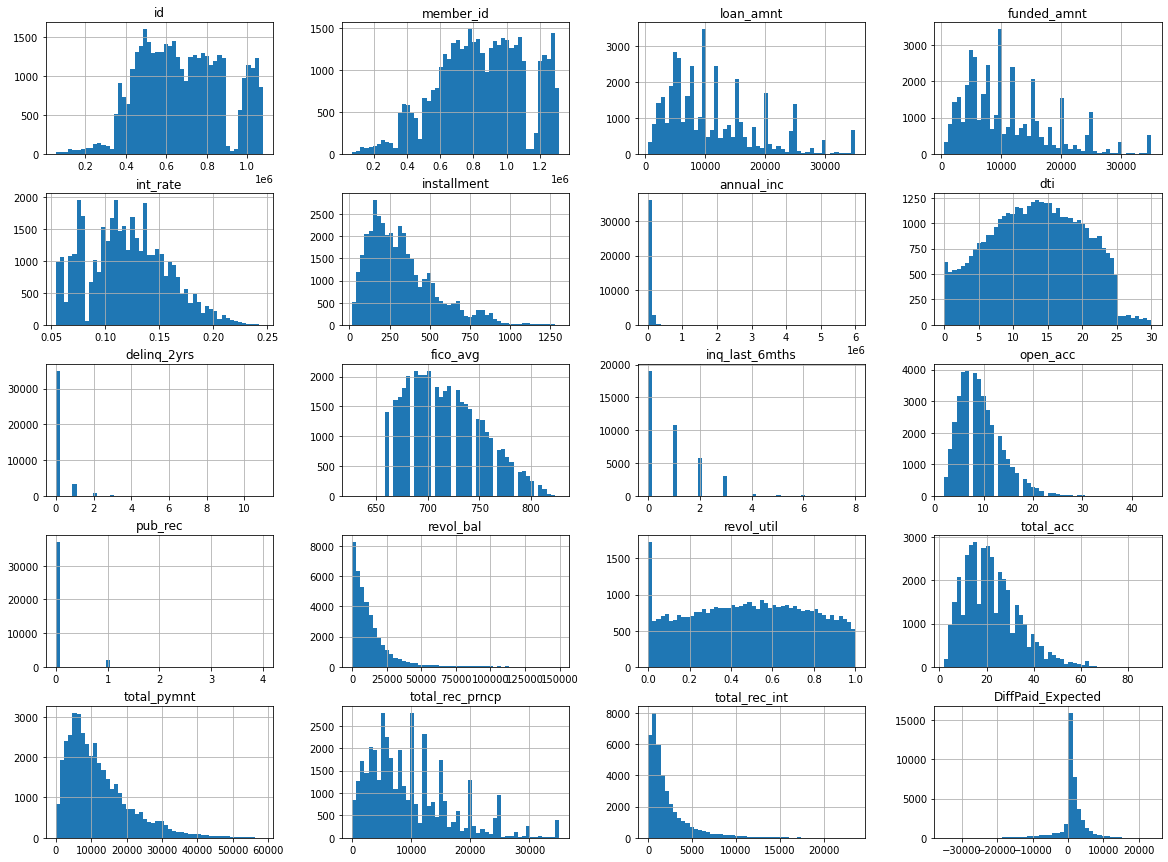

In [13]:
# Explore continuous data using histrogram
import matplotlib.pyplot as plt
loans_Completed.hist(bins=50, figsize = (20,15))
plt.show()

From these results, two id variabels need to be removed. These are id and member_id... 

delinq_2yrs, inq_last_6mths, pub_rec are factors rather than continuous variables and should be represented as factors based on their dictionary or description of the variables. 

Open_acc and Total_acc can be considered discrete in a way, but due to the large range, it is better to maintain it as continuous.


Also, looking at dti variable, we observe that a large group of individuals seem to have a dti ratio of '0'


In [14]:
# Convert mentioned variabels to categorical (Object)

loans_Completed['delinq_2yrs'] = loans_Completed['delinq_2yrs'].astype('object') 
loans_Completed['inq_last_6mths'] = loans_Completed['inq_last_6mths'].astype('object') 
loans_Completed['pub_rec'] = loans_Completed['pub_rec'].astype('object') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [15]:
# Remove id variables
loans_Completed = loans_Completed.drop(columns = ['id', 'member_id'])

loans_Completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39273 entries, 0 to 39785
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39273 non-null  int64  
 1   funded_amnt          39273 non-null  int64  
 2   loan_status          39273 non-null  object 
 3   int_rate             39273 non-null  float64
 4   term                 39273 non-null  object 
 5   installment          39273 non-null  float64
 6   Grade                39273 non-null  object 
 7   sub_grade            39273 non-null  object 
 8   emp_length           38214 non-null  object 
 9   home_ownership       39273 non-null  object 
 10  annual_inc           39273 non-null  float64
 11  verification_status  39273 non-null  object 
 12  issue_d              39273 non-null  object 
 13  pymnt_plan           39273 non-null  object 
 14  purpose              39273 non-null  object 
 15  addr_state           39273 non-null 

8 float variables, 6 integers and 16 object.

In [16]:
# Check for missing values

print(loans_Completed.isnull().sum())



loan_amnt                 0
funded_amnt               0
loan_status               0
int_rate                  0
term                      0
installment               0
Grade                     0
sub_grade                 0
emp_length             1059
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
pymnt_plan                0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
fico_avg                  0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_rec_prncp           0
total_rec_int             0
DiffPaid_Expected         0
Profit/Loss               0
dtype: int64


In [17]:
# Since we observe that emp_length variable has 1074 missing values, these values are actually for unemployed individuals. So replace these missing values with Unemployed

loans_Completed['emp_length'] = loans_Completed['emp_length'].fillna(value = 'Unemployed', method=None, axis=None, inplace=False)           # value: value to use to replace NaN
                                                                                                                                            # method: method to use for replacing NaN. method='ffill' does the forward replacement. method='bfill' does the backword replacement.
                                                                                                                                            # axis: 0 for row and 1 for column.
                                                                                                                                            # inplace: If True, do operation inplace and return None.


# Remove missing values in 'revol_util' since it is only 46 observations
loans_Completed = loans_Completed.dropna(subset = ['revol_util'])                                                                                                                                            

In [18]:
# Check for missing values again
print(loans_Completed.isnull().sum())

loan_amnt              0
funded_amnt            0
loan_status            0
int_rate               0
term                   0
installment            0
Grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
fico_avg               0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_rec_prncp        0
total_rec_int          0
DiffPaid_Expected      0
Profit/Loss            0
dtype: int64


All missing values in this case have been treated

In [19]:
# Create a new dataset only for categorical variables

loans_Cat = loans_Completed.select_dtypes(include=['object'])


In [20]:
# Use this new dataset to vizualize the categorical data, but first remove data variables or variables not expected to be used
loans_Cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   loan_status          39223 non-null  object
 1   term                 39223 non-null  object
 2   Grade                39223 non-null  object
 3   sub_grade            39223 non-null  object
 4   emp_length           39223 non-null  object
 5   home_ownership       39223 non-null  object
 6   verification_status  39223 non-null  object
 7   issue_d              39223 non-null  object
 8   pymnt_plan           39223 non-null  object
 9   purpose              39223 non-null  object
 10  addr_state           39223 non-null  object
 11  delinq_2yrs          39223 non-null  object
 12  earliest_cr_line     39223 non-null  object
 13  inq_last_6mths       39223 non-null  object
 14  pub_rec              39223 non-null  object
 15  Profit/Loss          39223 non-null  object
dtypes: o

issue_d is not necessary for current analysis of variables, 
earliest_cr_line is also unecessary
So these can be remove from subset first

In [21]:
# Drop issue_d variable
loans_Completed = loans_Completed.drop(columns = ['issue_d', 'earliest_cr_line'])

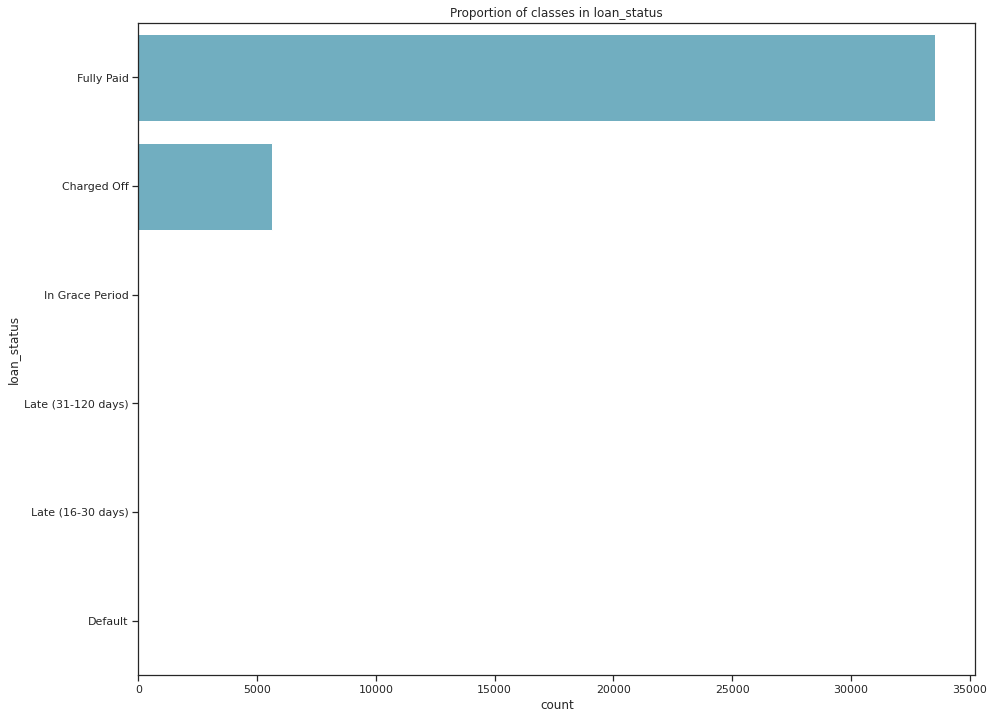

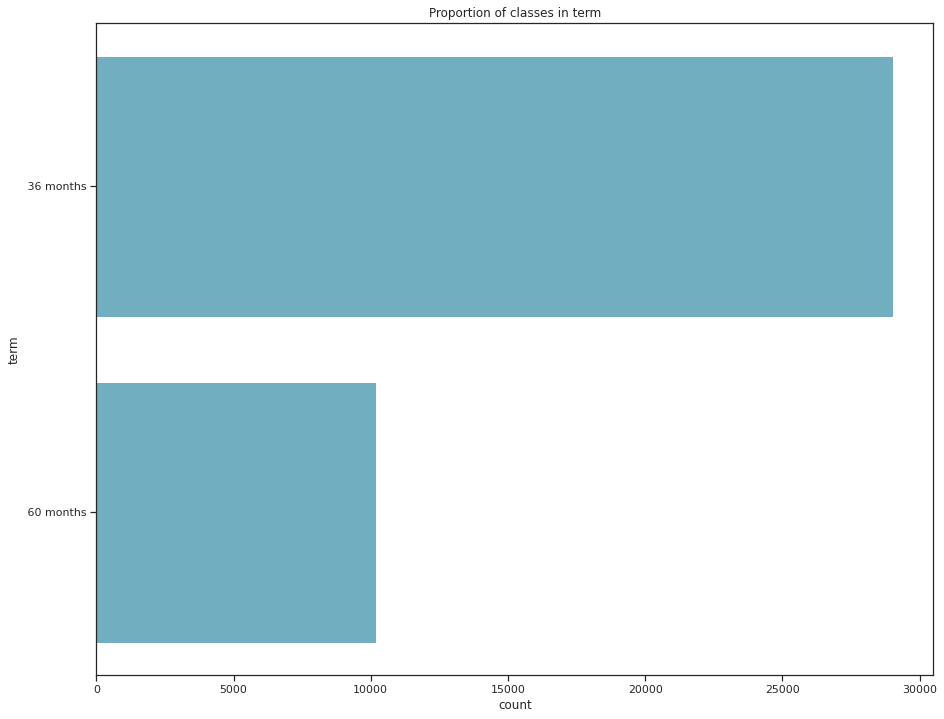

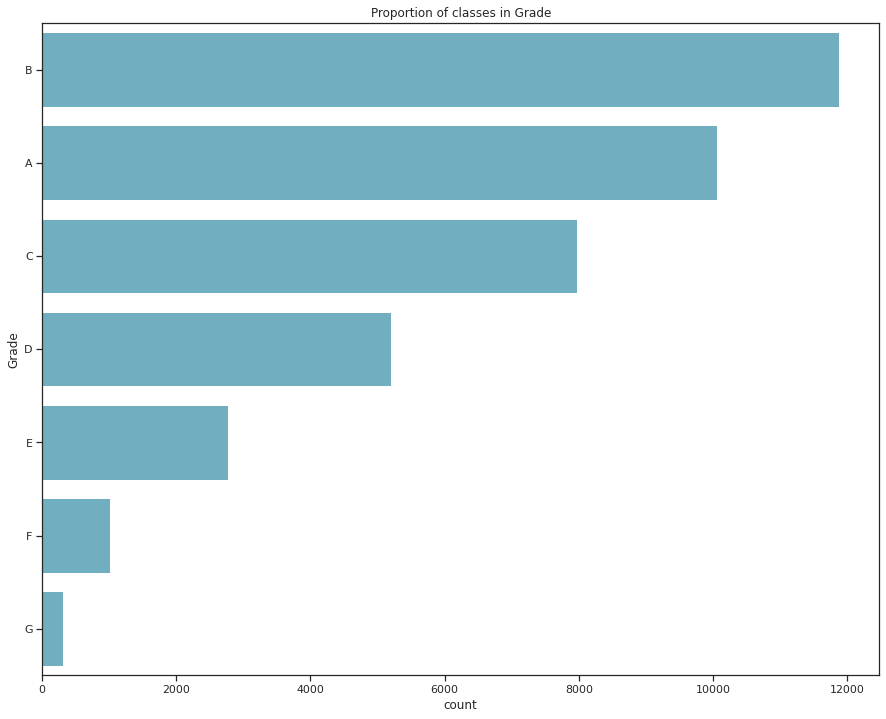

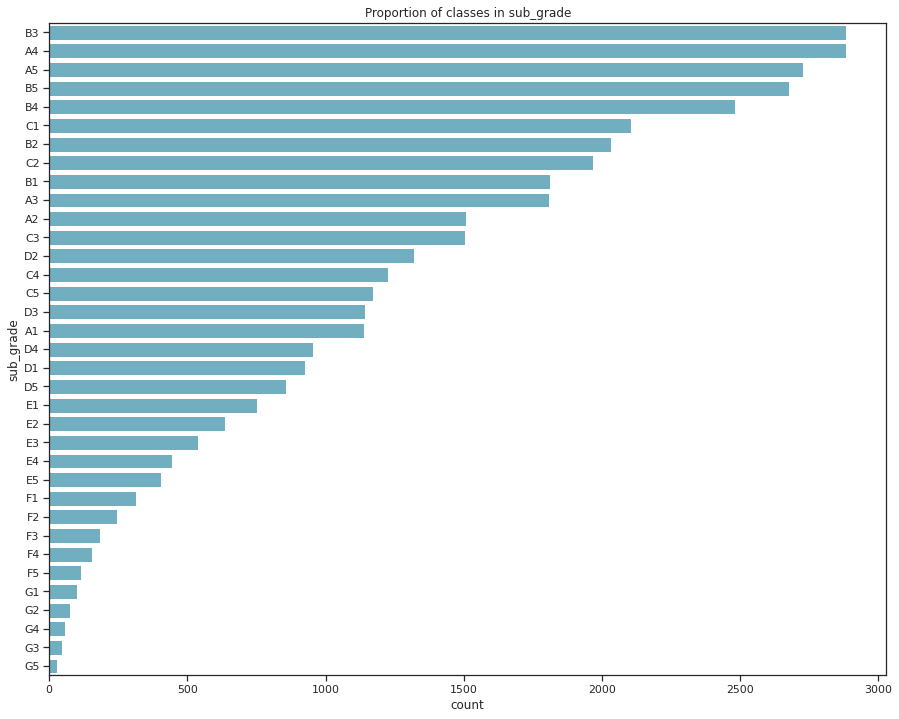

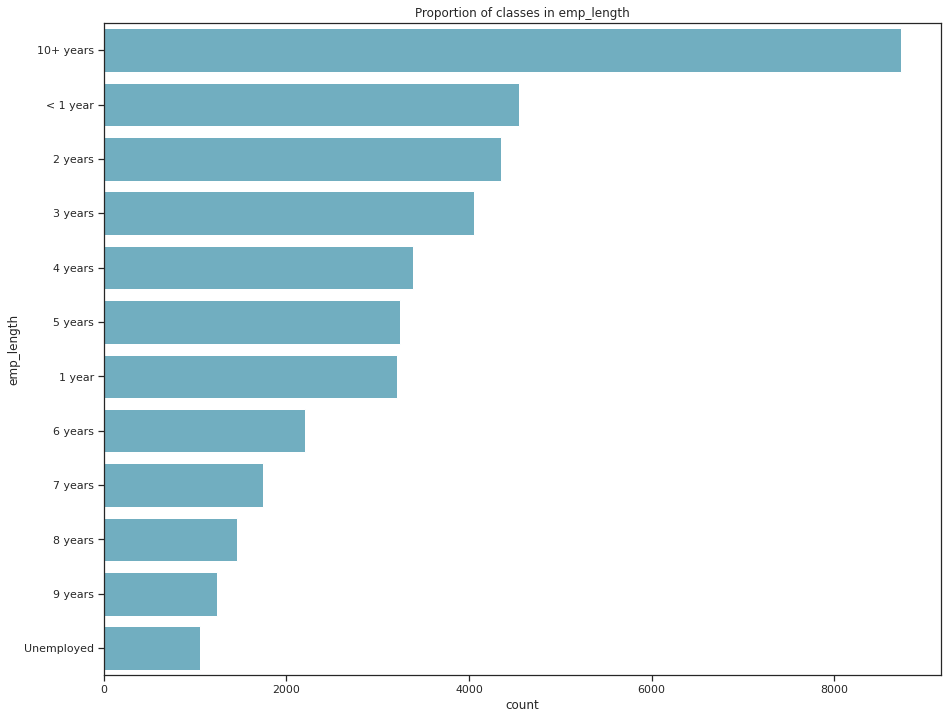

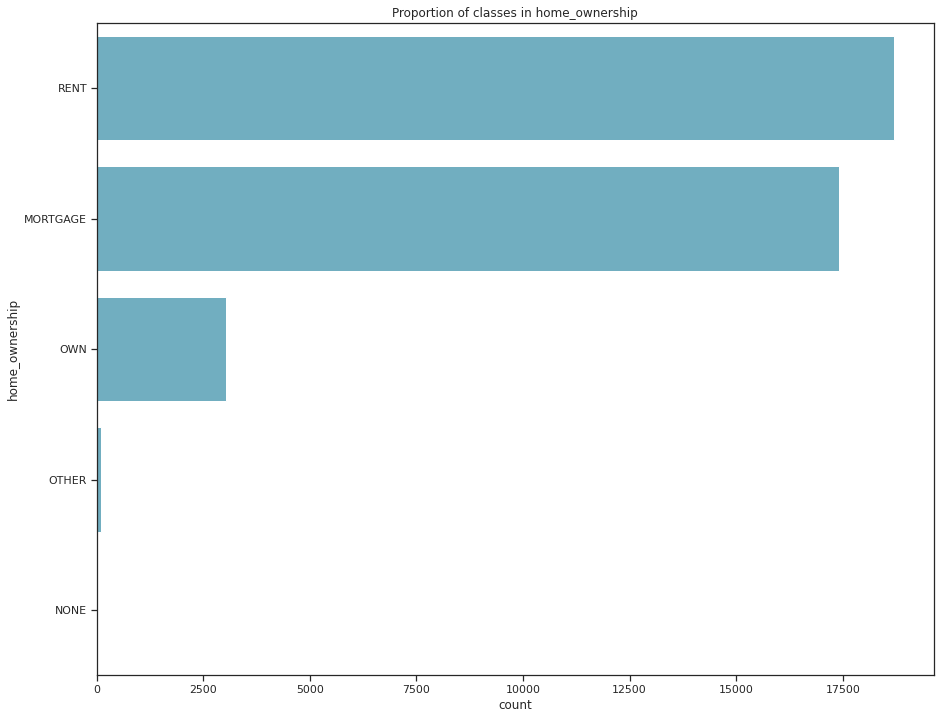

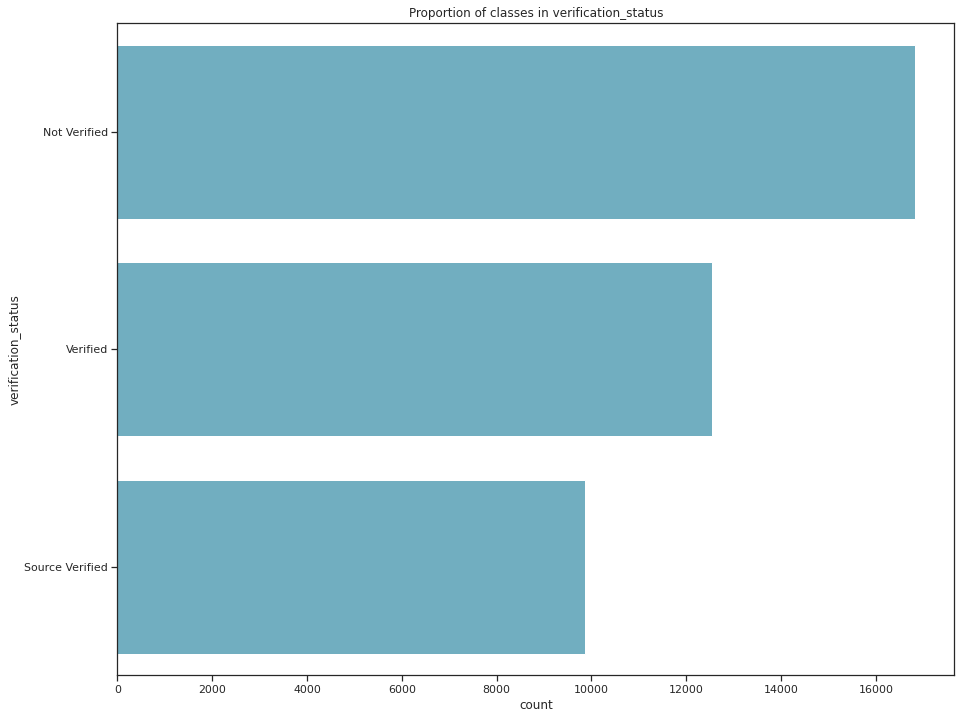

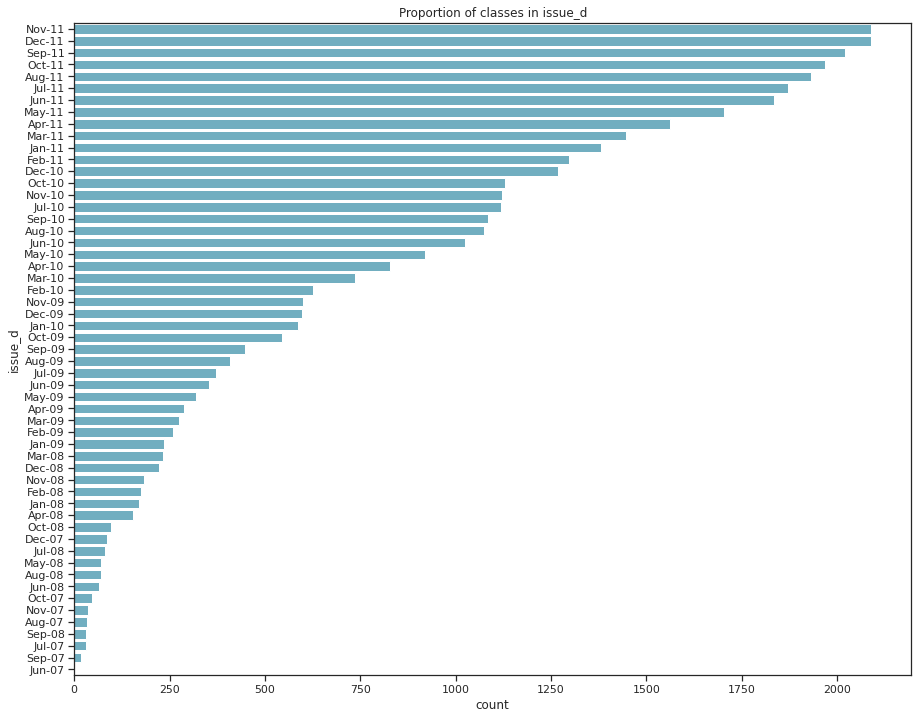

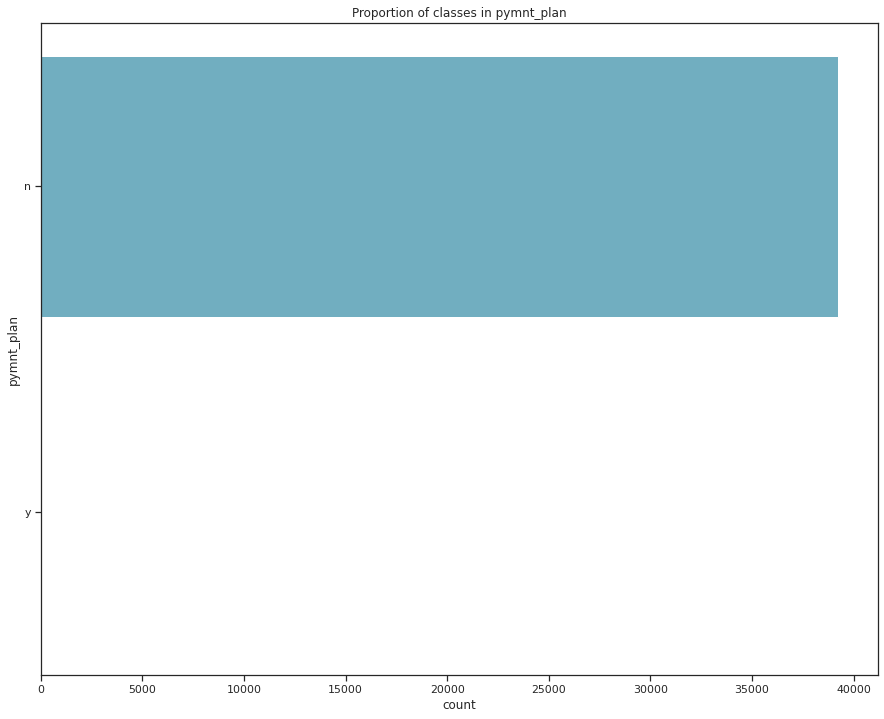

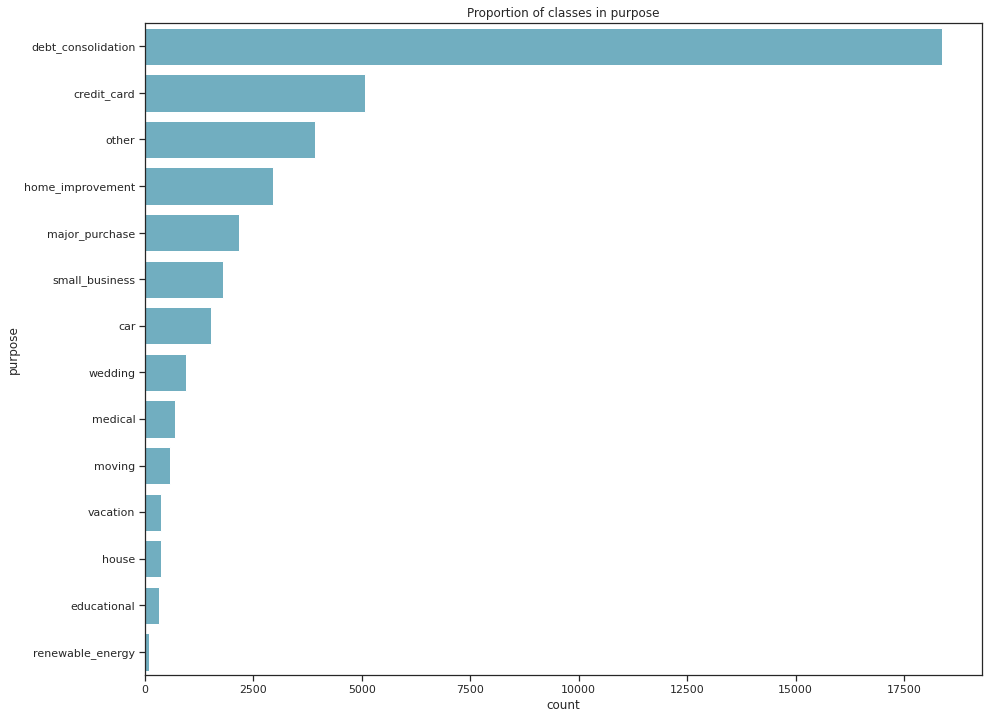

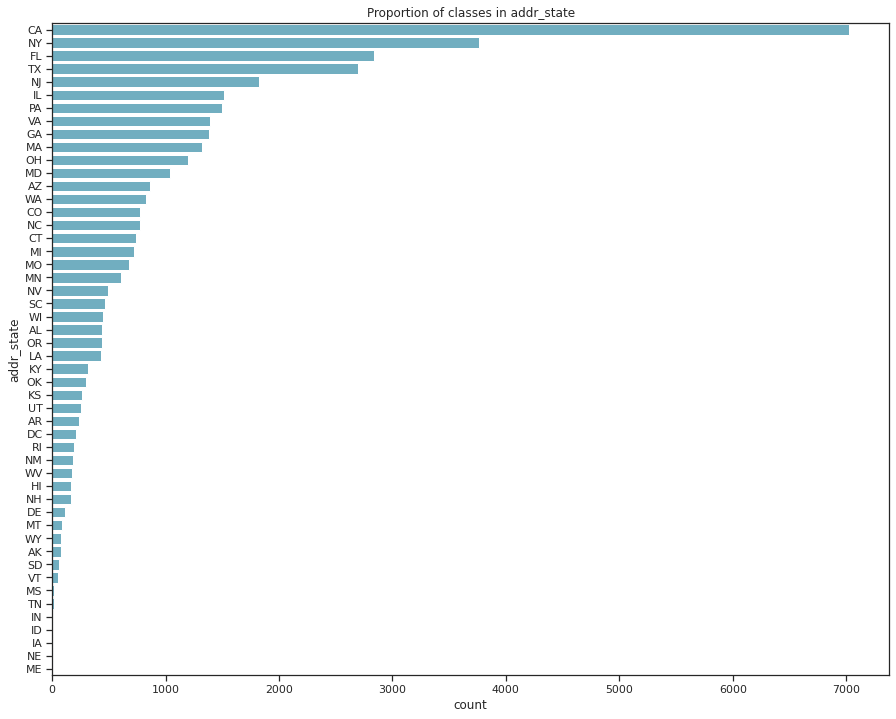

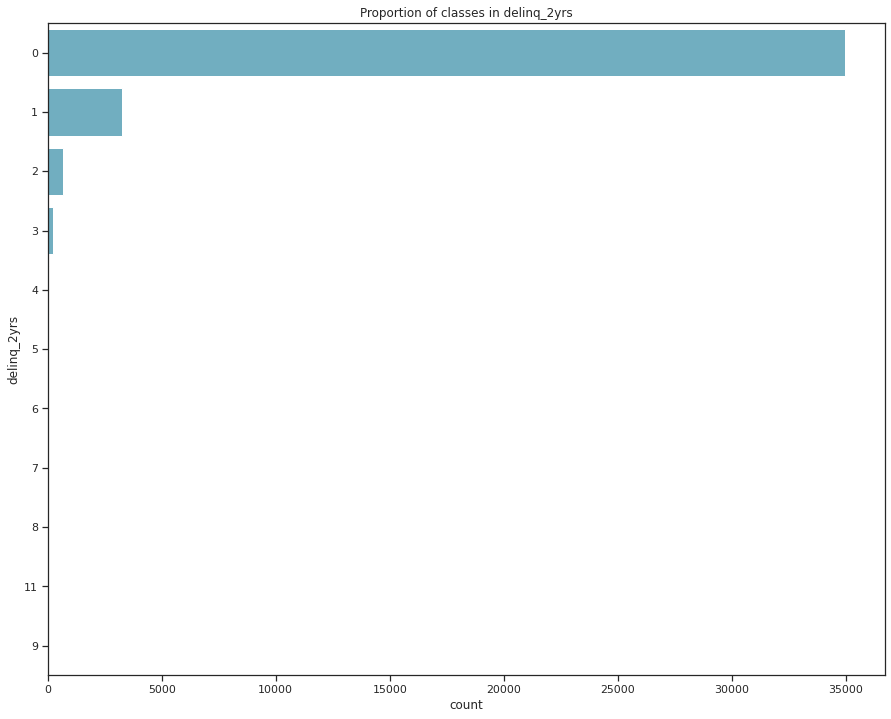

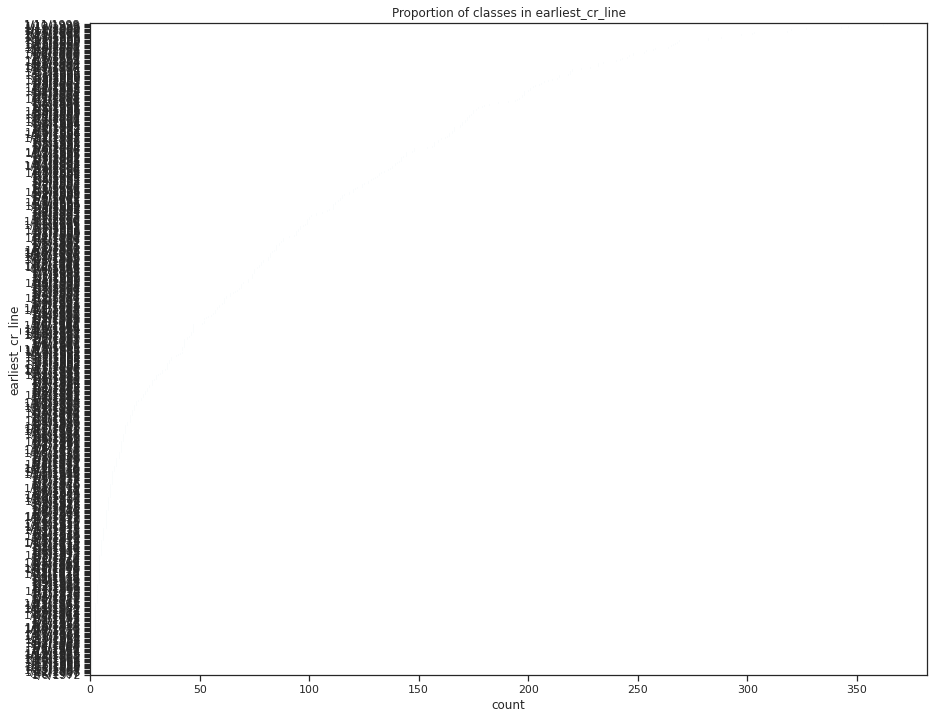

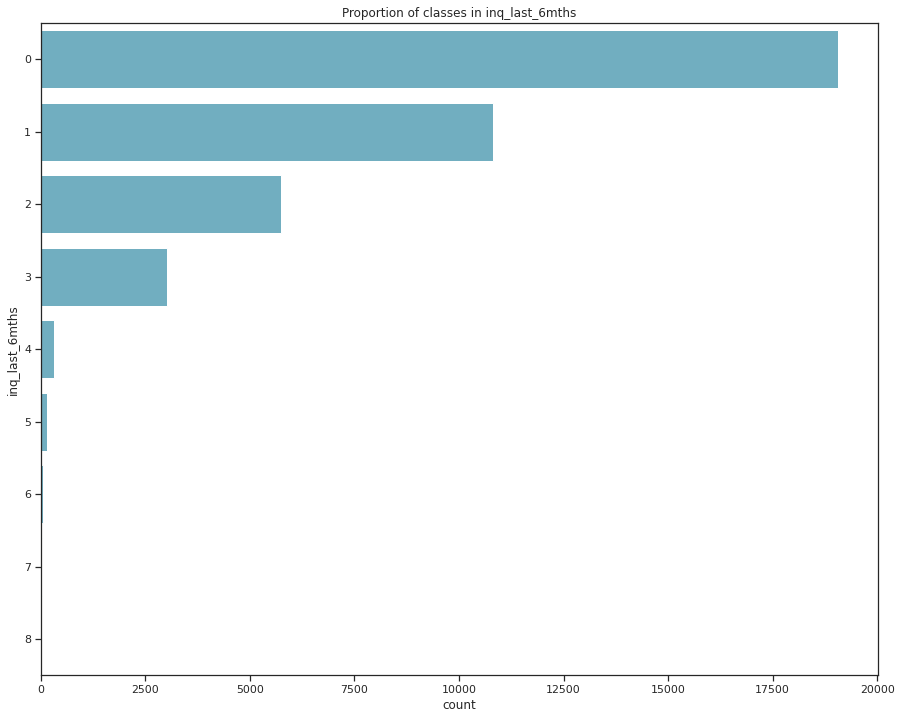

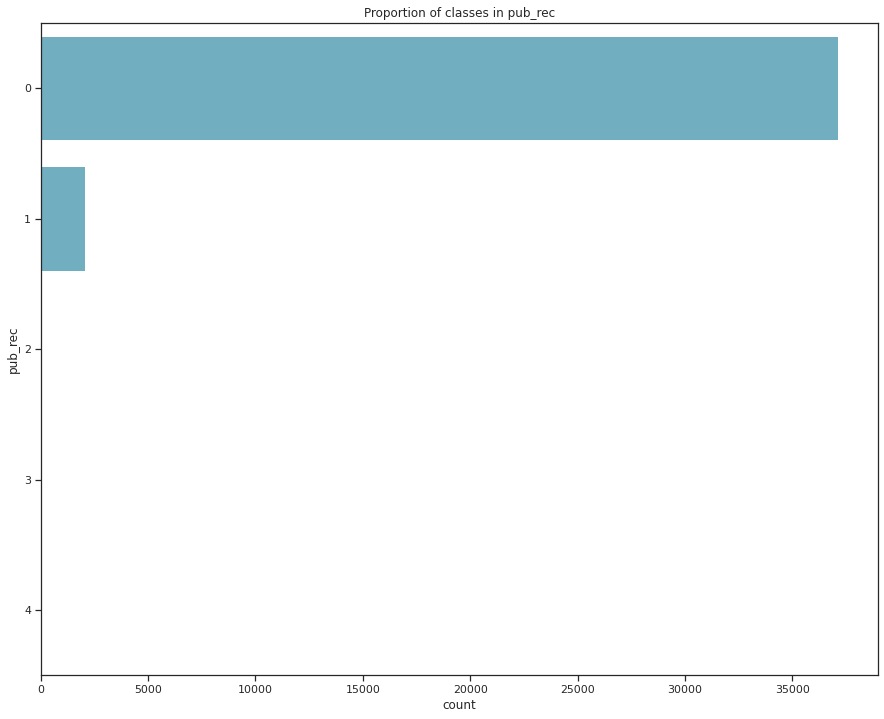

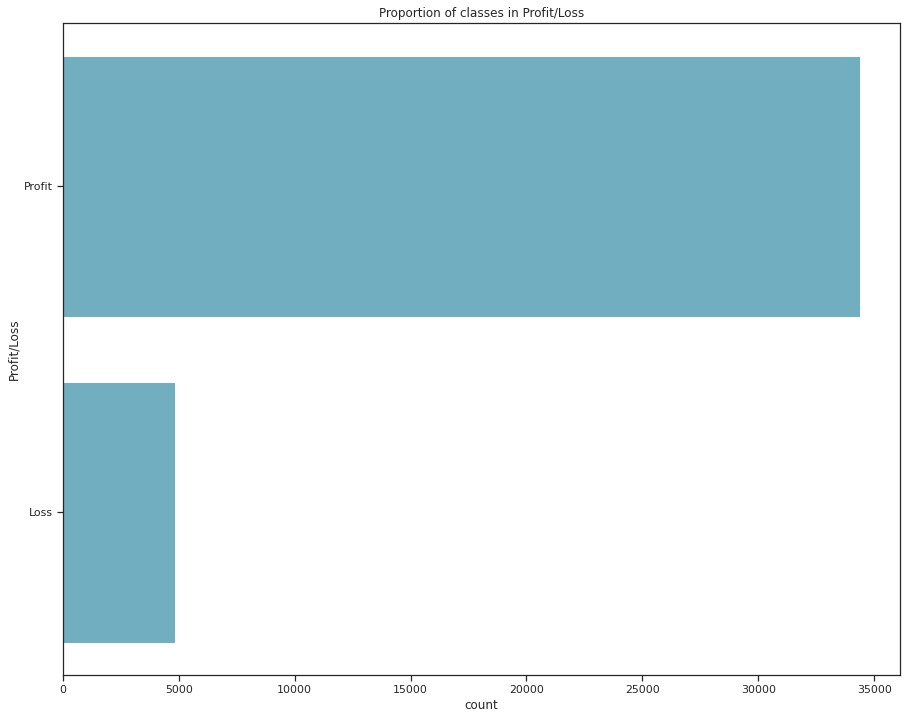

In [22]:
# Visualize the different cateogrical variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)          # Set the theme for the plot               


def cat_function(y):                                    # Create a function to visualize categorical variables using a FOR loop
    n = y.shape[1]                                      # Define number of columns as the number of times the loop works
    for i in range(0,n):
        column_name = y.columns[i]                      # Retrieve column name to be used for plot labels
        plt.figure(figsize=(15, 12))                    # Define figure size of plots
        sns.countplot(y = column_name, 
                      data = y,
                      color = "c",
                      order = y[column_name].value_counts().index).set_title("Proportion of classes in {}".format(column_name))  # Order here allows for the grouping of classes in the plots in descending order
                                                                                                                                 # Set_title sets the title of a plot. {} represents an empty space to be replaced with whatever value is identified in "format()" afterwards.


cat_function(loans_Cat)



1) Loan status, majority of loans are either paid off or charged off

2) Grade and sub-grade are similar variables to each other and are possibly related to int_rate based on data dictionary. Since grades are given based on int-rate. Might want to consider removing them from analysis or maintaining one variable.

3) emp_length too many classes
4) Pymnt_plan is a useless variable. Check for proportion

5) Purpose has too many classes

6) addr_state too many classes

7) delinq_2yrs -- majority of indiviudals had 0 or 1 delinwuencies

8) inq_last_6mths -- majority of inquiries 0,1,2,3 beyond that too little

9) Pub-rec -- Majority 0,1

10) Profit/Loss - Most loans ended in a profit, focus should be on loans that ended in loss


In [23]:
# Alternate method for data cleaning or removal / replacement of missing values

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy = "median")        In this case we are creating an instance that will replace each variable's missing value using it's median value, however since median imputation only works on  numerical data, remove all other data and keep the numerical data.
# loans_num = loans.drop("variables_cat", axis = 1)


# After this, we can fit the created imputer instance to the training data which will then evaluate the median value of all variables

# To find the values that were calculated as mean for each variable:::
# imputer.statistics_                               

# Then, to apply this onto the different variables and replace all missing values with median

# X = imputer.transform(loans_num)


# The values returned as X is a simple NumPy array containing the transformed data... So, to convert back to dataframe



# Hands-On machine learning with Scikit-Learn, keras and tensorflow Page 63, 64



In [24]:
# Reduce the number of classes in each variable

# First, start with Purpose

round(loans_Completed["purpose"].value_counts(normalize = True) * 100, 2)  


debt_consolidation    46.86
credit_card           12.94
other                 10.01
home_improvement       7.52
major_purchase         5.55
small_business         4.58
car                    3.91
wedding                2.40
medical                1.75
moving                 1.48
vacation               0.96
house                  0.95
educational            0.82
renewable_energy       0.26
Name: purpose, dtype: float64

In [25]:
# To replace values in the purpose variable, create a dictionary of the labels and their replacement

replace_purpose = {'purpose': {'renewable_energy': 'other', 'home_improvement': 'personal', 'car' : 'personal', 'wedding': 'personal',
                                  'medical': 'personal', 'moving': 'personal', 'vacation': 'personal' , 'house': 'personal' , 'educational': 'personal',}}


# Now use that to replace labels in the variable

loans_Completed1 = loans_Completed.copy()
loans_Completed1.replace(replace_purpose, inplace = True)

# Recheck for percentage of categories
round(loans_Completed1["purpose"].value_counts(normalize = True) * 100, 2) 

debt_consolidation    46.86
personal              19.79
credit_card           12.94
other                 10.27
major_purchase         5.55
small_business         4.58
Name: purpose, dtype: float64

In [26]:
# NExt, delinq_2yrs and inq_last_6mths

# Recheck for percentage of categories
print(round(loans_Completed1[["delinq_2yrs"]].value_counts(normalize = True) * 100, 2) )
print("\n")
print(round(loans_Completed1["inq_last_6mths"].value_counts(normalize = True) * 100, 2) )
print("\n")
round(loans_Completed1["pub_rec"].value_counts(normalize = True) * 100, 2)
print("\n")
round(loans_Completed1["emp_length"].value_counts(normalize = True) * 100, 2)


delinq_2yrs
0              89.12
1               8.33
2               1.73
3               0.56
4               0.15
5               0.05
6               0.03
7               0.01
8               0.01
11              0.00
9               0.00
dtype: float64


0    48.59
1    27.56
2    14.66
3     7.71
4     0.82
5     0.37
6     0.16
7     0.09
8     0.04
Name: inq_last_6mths, dtype: float64






10+ years     22.25
< 1 year      11.60
2 years       11.08
3 years       10.33
4 years        8.65
5 years        8.28
1 year         8.18
6 years        5.61
7 years        4.44
8 years        3.71
9 years        3.18
Unemployed     2.69
Name: emp_length, dtype: float64

In [27]:
# Now perform same process done for "purpose" variable
replace_delinq_2yrs = {"delinq_2yrs": {3: '3+', 4: '3+', 5 : '3+', 6 : '3+',
                                  7 :'3+', 8: '3+', 9 : '3+' , 11 : '3+'}}

replace_inq_last_6mths = {"inq_last_6mths": {4: '4+', 5 : '4+', 6 : '4+', 7 : '4+',
                                  8 : '4+'}}

replace_pub_rec = {"pub_rec": {2: '2+', 3 : '2+', 4 : '2+'}}

replace_emp_length = {"emp_length" : {'< 1 year': '0 - 4 years', '1 year' : '0 - 4 years', '2 years': '0 - 4 years', '3 years': '0 - 4 years', '4 years': '0 - 4 years', 
                                      '5 years': '5 - 9 years', '6 years': '5 - 9 years', '7 years': '5 - 9 years', '8 years': '5 - 9 years', '9 years': '5 - 9 years'}}



In [28]:
# Replace terms in new dataset

loans_Completed2  = loans_Completed1.copy()                                     # copy() here ensures original dataset is not altered

# Replace all variables in one go

loans_Completed2.replace(replace_delinq_2yrs, inplace = True)
loans_Completed2.replace(replace_inq_last_6mths, inplace = True)
loans_Completed2.replace(replace_pub_rec, inplace = True)
loans_Completed2.replace(replace_emp_length, inplace = True)

In [29]:
# CHeck for proportion of classes in variables

print(round(loans_Completed2[["delinq_2yrs"]].value_counts(normalize = True) * 100, 2) )
print("\n")
print(round(loans_Completed2["inq_last_6mths"].value_counts(normalize = True) * 100, 2) )
print("\n")
round(loans_Completed2["pub_rec"].value_counts(normalize = True) * 100, 2)
print("\n")
round(loans_Completed2["emp_length"].value_counts(normalize = True) * 100, 2)


delinq_2yrs
0              89.12
1               8.33
2               1.73
3+              0.81
dtype: float64


0     48.59
1     27.56
2     14.66
3      7.71
4+     1.48
Name: inq_last_6mths, dtype: float64






0 - 4 years    49.84
5 - 9 years    25.21
10+ years      22.25
Unemployed      2.69
Name: emp_length, dtype: float64

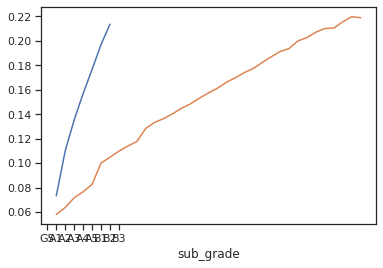

In [30]:
# Plot interest rate against GRADE AND SUB-GRADE

loans_avg_intrate = loans_Completed2.groupby(['Grade']).mean()['int_rate']

# To do so, first evaluate the average interest rate for each grade and then plot on a line  graph as follows

loans_avg_intrate.plot()


# Similarly, do the same for  "Sub-Grade"
loans_avg_intrateSG = loans_Completed2.groupby(['sub_grade']).mean()['int_rate']
loans_avg_intrateSG.plot()


Results are not that great in terms of vizualization

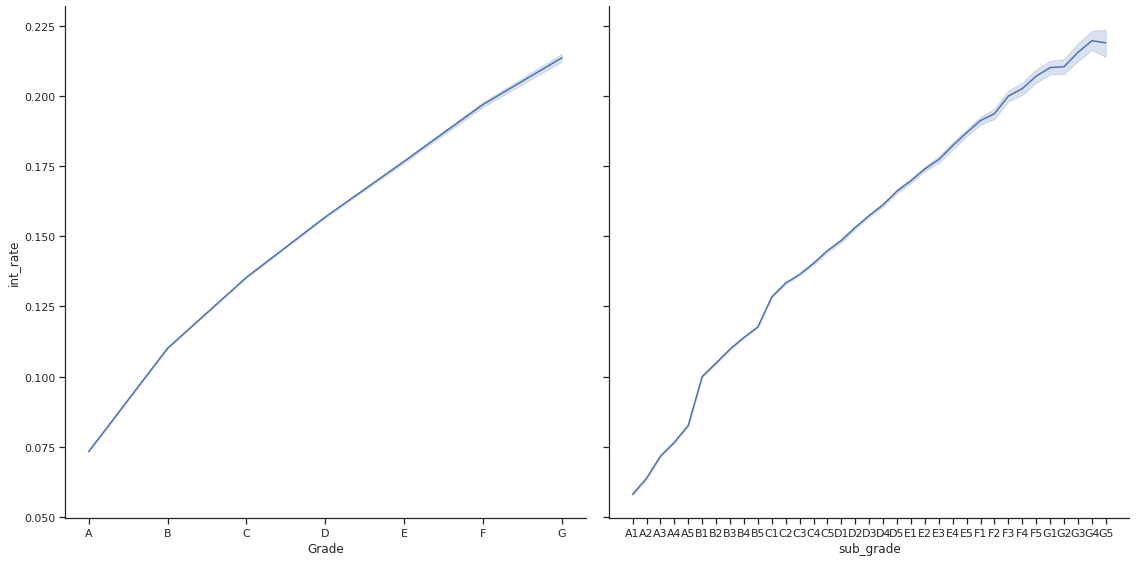

In [31]:
import seaborn as sns

# Sort the data using the subgrades
loans_groupedbyGr = loans_Completed2.sort_values(by = ['sub_grade'])


# Plot interest rate against the grade and sub grade using seaborn
g = sns.PairGrid(loans_groupedbyGr, y_vars = ["int_rate"], x_vars = ["Grade", "sub_grade"], height =8)
g.map(sns.lineplot)



There is somewhat of a linear relation between Grade, Sub-grade and int_rate... Therefore, dropping it isn't too much of an issue

In [32]:
# Drop states, grade, sub-grade, loanstatus and pymnt_plan

loans_final = loans_Completed2.drop(['Grade','sub_grade','loan_status','pymnt_plan','addr_state'], axis = 1)

loans_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39223 non-null  int64  
 1   funded_amnt          39223 non-null  int64  
 2   int_rate             39223 non-null  float64
 3   term                 39223 non-null  object 
 4   installment          39223 non-null  float64
 5   emp_length           39223 non-null  object 
 6   home_ownership       39223 non-null  object 
 7   annual_inc           39223 non-null  float64
 8   verification_status  39223 non-null  object 
 9   purpose              39223 non-null  object 
 10  dti                  39223 non-null  float64
 11  delinq_2yrs          39223 non-null  object 
 12  fico_avg             39223 non-null  int64  
 13  inq_last_6mths       39223 non-null  object 
 14  open_acc             39223 non-null  int64  
 15  pub_rec              39223 non-null 

In [33]:
# Since we are looking to predict whether a loan ends in profit/loss, remove payment details of loans

loans_predict = loans_final.drop(['total_pymnt','total_rec_prncp','total_rec_int','DiffPaid_Expected', 'revol_bal','revol_util','loan_amnt'], axis =1)

loans_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          39223 non-null  int64  
 1   int_rate             39223 non-null  float64
 2   term                 39223 non-null  object 
 3   installment          39223 non-null  float64
 4   emp_length           39223 non-null  object 
 5   home_ownership       39223 non-null  object 
 6   annual_inc           39223 non-null  float64
 7   verification_status  39223 non-null  object 
 8   purpose              39223 non-null  object 
 9   dti                  39223 non-null  float64
 10  delinq_2yrs          39223 non-null  object 
 11  fico_avg             39223 non-null  int64  
 12  inq_last_6mths       39223 non-null  object 
 13  open_acc             39223 non-null  int64  
 14  pub_rec              39223 non-null  object 
 15  total_acc            39223 non-null 

One hot encoding

In [34]:
# Remove categorical variables from data and represent them as separate set of variables to allow for onehotencoding

loans_Cat2 = loans_predict.select_dtypes(include=['object'])

# Remove continuous variables from data to allow for MinMAx scaling

loans_cont = loans_predict.select_dtypes(include=['int64','float64'])

In [35]:
# For categorical data dummification

loans_dumm = pd.get_dummies(loans_Cat2)   
loans_dumm.head()  

loans_dumm.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39223 entries, 0 to 39785
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   term_ 36 months                      39223 non-null  uint8
 1   term_ 60 months                      39223 non-null  uint8
 2   emp_length_0 - 4 years               39223 non-null  uint8
 3   emp_length_10+ years                 39223 non-null  uint8
 4   emp_length_5 - 9 years               39223 non-null  uint8
 5   emp_length_Unemployed                39223 non-null  uint8
 6   home_ownership_MORTGAGE              39223 non-null  uint8
 7   home_ownership_NONE                  39223 non-null  uint8
 8   home_ownership_OTHER                 39223 non-null  uint8
 9   home_ownership_OWN                   39223 non-null  uint8
 10  home_ownership_RENT                  39223 non-null  uint8
 11  verification_status_Not Verified     39223 non-null  u

In [36]:
# Identify variables with nearzerovariance or zero variance since they are technically of no use. Threshold 0.1 variance



variance = loans_dumm.var()                             # Find variance of variables
columns = loans_dumm.columns
variable = []
for i in range(0, len(variance)):
  if variance[i] < 0.01:                                # Identifyying variables with less than 1% variance
    variable.append(columns[i])



variable



['home_ownership_NONE', 'home_ownership_OTHER', 'delinq_2yrs_3+', 'pub_rec_2+']

In [37]:

# Remove identified variables with low vairance

loans_dummVar = loans_dumm.drop(columns = variable)


In [38]:
# To apply multiple functions to one set of data, a pipeline can be used

 # To use a pipeline ::::: from sklearn.pipeline import Pipeline
                         # from sklearn.preprocessing import StandardScaler
                         # num_pipeline = Pipeline([
                         # ('imputer', SimpleImputer(strategy="median")),
                         # ('attribs_adder', CombinedAttributesAdder()),
                         # ('std_scaler', StandardScaler()),
                         # ])                                                                  # In this case, first function is impute missing data with median, 
                                                                                               # then CombinedAttributesAdder followed by scalng of data

                         # housing_num_tr = num_pipeline.fit_transform(housing_num)             # Then, transform the data using the created pipeline



                  


# NB :: Difference between fit_transform() and transform() and fit()
#     fit()  will evaluate the desired factors from a dataset. For example, if we are scaling the data, it will calculate the variance and the mean of the data. Then the transform() function will scale the data using the mean and variance calculated. fit_transform() will performe both consectively. So,Following statistical standard for data standardization, the training data can be used on a fit() function to identify the mean and variance. Then, This information can be used to "transform()" or in this case scale the training and testing data based on variance and mean of training data


Code example:

# fit
normalizer = preprocessing.Normalizer().fit(xtrain)

#transform

xtrainnorm = normalizer.transform(xtrain)

xtestnorm = normalizer.transform(Xtest) 


In [39]:
# Logarithmic Transformation of variables to be normally distributed

import numpy as np

loans_cont2 = loans_cont.copy()


for i in range(0, np.shape(loans_cont2)[1]):
  if loans_cont2.iloc[:,i].skew() >= 1 :
    colname = loans_cont2.columns[i]
    loans_cont2[colname] = np.log1p(loans_cont2.iloc[:,i])                        # Log transform of variables using log1p()
    loans_cont2.columns.values[i] = 'log_' + colname




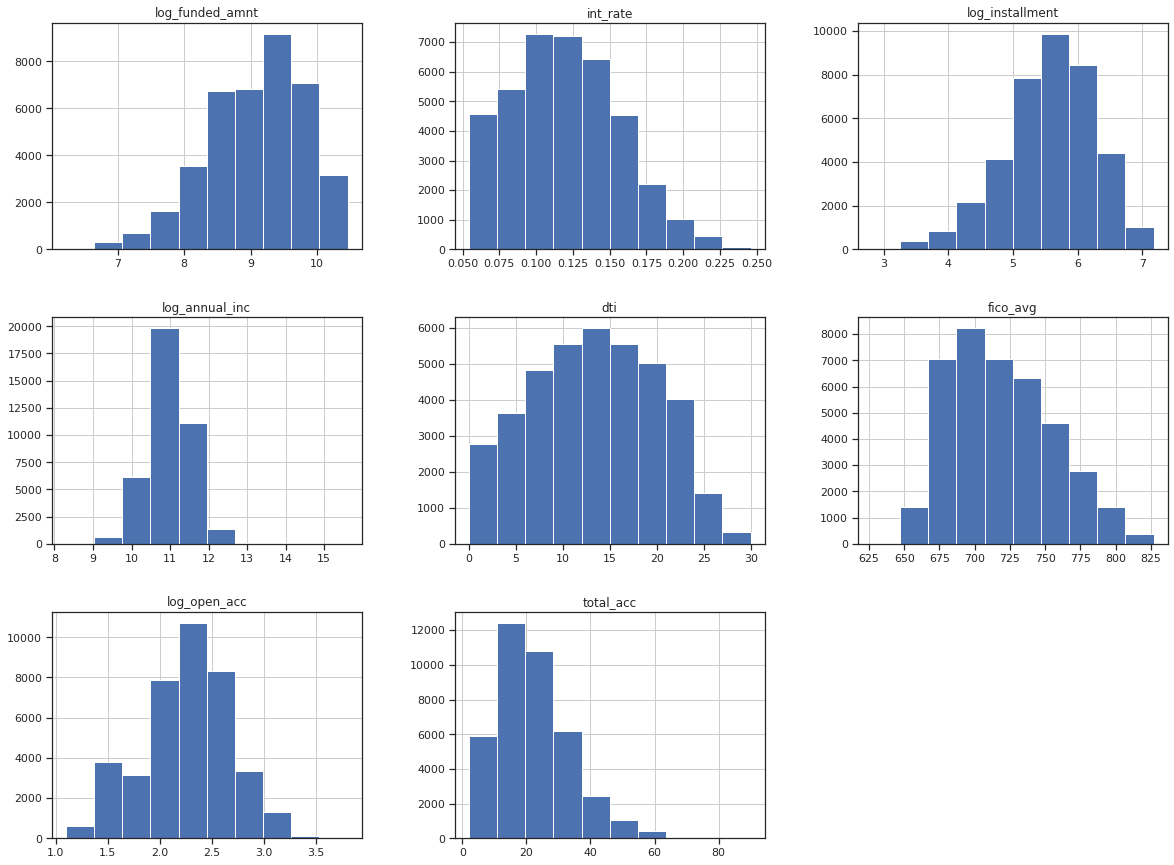

In [40]:
# Check distribution of transformed variables

loans_cont2.hist(figsize = (20,15))
plt.show()


In [41]:

# Then, perform Minmaxscaling on the continuous variables.

cont_attr = loans_cont2.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# transform the continuous data using minmaxscaling

loans_cont_scaled = pd.DataFrame(scaler.fit_transform(loans_cont2), columns = cont_attr)
loans_cont_scaled

,log_funded_amnt,int_rate,log_installment,log_annual_inc,dti,fico_avg,log_open_acc,total_acc
0,0.541805,0.272822,0.523906,0.244983,0.921974,0.550,0.106232,0.079545
1,0.378625,0.513824,0.296618,0.275495,0.033344,0.575,0.106232,0.022727
2,0.369016,0.549817,0.374242,0.153047,0.290764,0.550,0.000000,0.090909
3,0.705008,0.420970,0.691515,0.343140,0.666889,0.325,0.479785,0.397727
4,0.541805,0.129369,0.514755,0.300425,0.373458,0.525,0.444590,0.113636
...,...,...,...,...,...,...,...,...
39218,0.378625,0.138237,0.357780,0.453160,0.377793,0.675,0.568839,0.431818
39219,0.666741,0.253521,0.643791,0.205646,0.213404,0.325,0.312881,0.079545
39220,0.541805,0.138237,0.515308,0.440127,0.076692,0.575,0.511916,0.204545
39221,0.541805,0.104851,0.513176,0.534910,0.124041,0.925,0.661642,0.272727


All variables are scaled, grouped and ready for modelling

In [42]:
# Concatenate continuous and categorical to prepare data for analysis

loans_analysis = pd.concat([loans_cont_scaled, loans_dummVar], axis = 1)

loans_ready = loans_analysis.dropna()
loans_ready.isna().sum()

log_funded_amnt                        0
int_rate                               0
log_installment                        0
log_annual_inc                         0
dti                                    0
fico_avg                               0
log_open_acc                           0
total_acc                              0
term_ 36 months                        0
term_ 60 months                        0
emp_length_0 - 4 years                 0
emp_length_10+ years                   0
emp_length_5 - 9 years                 0
emp_length_Unemployed                  0
home_ownership_MORTGAGE                0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_major_purchase                 0
purpose_other                          0
purpose_personal

In [43]:
# Examine proportion of classes in target variable

round(loans_ready["Profit/Loss_Loss"].value_counts(normalize = True) * 100, 2)     



0.0    87.68
1.0    12.32
Name: Profit/Loss_Loss, dtype: float64

Highly imbalanced dataset. So, to overcome this, two methods will be examined --- Oversampling and undersampling

In [44]:
loans_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38660 entries, 0 to 39222
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   log_funded_amnt                      38660 non-null  float64
 1   int_rate                             38660 non-null  float64
 2   log_installment                      38660 non-null  float64
 3   log_annual_inc                       38660 non-null  float64
 4   dti                                  38660 non-null  float64
 5   fico_avg                             38660 non-null  float64
 6   log_open_acc                         38660 non-null  float64
 7   total_acc                            38660 non-null  float64
 8   term_ 36 months                      38660 non-null  float64
 9   term_ 60 months                      38660 non-null  float64
 10  emp_length_0 - 4 years               38660 non-null  float64
 11  emp_length_10+ years        

In [45]:
# Split data first to training and testing before oversampling. Reason for this being that testing data should not be influenced by training data

X = loans_ready.iloc[:,:-2]            # :-2 here means it will take data from the first column upto before the last 2 columns
y = loans_ready.iloc[:,-2]             # It will only containthe profit/loss target identifying loss as 1

X.columns
y.name

'Profit/Loss_Loss'

In [46]:
# Confirm imbalanced data
round(y.value_counts(normalize = True) * 100, 2) 

0.0    87.68
1.0    12.32
Name: Profit/Loss_Loss, dtype: float64

In [47]:
# Split data to training and testing

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123 )

In [48]:
# Examine percentage of loss and profit in target variables

print(round(y_train.value_counts(normalize = True) * 100, 2) )

round(y_test.value_counts(normalize = True) * 100, 2) 


0.0    87.89
1.0    12.11
Name: Profit/Loss_Loss, dtype: float64


0.0    87.18
1.0    12.82
Name: Profit/Loss_Loss, dtype: float64

In [49]:
# Create validation set

# Split training data to training and validation

X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train, y_train, test_size = 0.2, random_state = 123)     # Using 20 % of data as validation, randomly selected 



In [50]:
# Now, perform oversampling on training data

from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state = 124 , k_neighbors = 10 , ratio = 1 )               # Random_state here is like set.seed in R. k_neighbours odentofies the number of nearby neighbours that the data can extrapolate

X_trainoversampled, y_trainoversampled = oversample.fit_resample(X_train1, y_train1)                         # This will not retain column names, so to retain colnames, reform both arrays as dataframes

X_train1 = pd.DataFrame(X_trainoversampled, columns = X.columns)
y_train1 = pd.Series(y_trainoversampled, name = y.name)




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE causes loss of columns names, so apparently the only way to retrieve this is to return all the data back to it's original form as a dataframe and reintroduce the column names manually

In [51]:
X_train1.value_counts()

log_funded_amnt  int_rate  log_installment  log_annual_inc  dti       fico_avg  log_open_acc  total_acc  term_ 36 months  term_ 60 months  emp_length_0 - 4 years  emp_length_10+ years  emp_length_5 - 9 years  emp_length_Unemployed  home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_major_purchase  purpose_other  purpose_personal  purpose_small_business  delinq_2yrs_0  delinq_2yrs_1  delinq_2yrs_2  inq_last_6mths_0  inq_last_6mths_1  inq_last_6mths_2  inq_last_6mths_3  inq_last_6mths_4+  pub_rec_0  pub_rec_1
1.000000         0.923839  0.936498         0.547943        0.612204  0.200000  0.405684      0.295455   1.0              0.0              1.000000                0.000000              0.0                     0.0                    0.0                      0.0                 1.0                  0.0             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


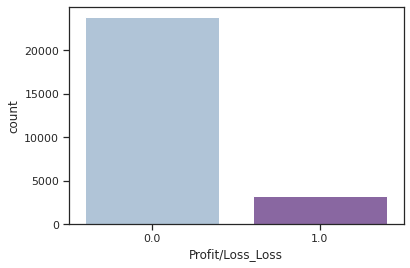

In [52]:
# Analyze distribution of target vars
import seaborn as sns
sns.countplot(y_train, palette='BuPu')


… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.





In [53]:
# Examine VIF in training data and remove variables with high VIF one by one using a loop

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_traindf = X_train1.copy()

# calculating VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X):

    '''X_traindf - pandas dataframe'''
    thresh = 10.0
    variables = X.columns.tolist()
    

    for i in np.arange(0, len(X)):
        vif = pd.DataFrame(columns = ['Features', 'VIF factor'])
        vif ['Features'] = X[variables].columns
        vif ['VIF factor'] = [variance_inflation_factor(X[variables].values, ix) for ix in range(len(variables))]
        vif_filt = vif[np.isfinite(vif['VIF factor'])]
        if vif_filt['VIF factor'].max() > thresh:
          maxim = vif_filt[vif_filt['VIF factor'] == vif_filt['VIF factor'].max()]
          colname = maxim.iat[0,0]
          print(colname)
          variables.remove(colname)
        else:
          break


    print('Remaining variables:')
    print(X[variables])
    print(list(set(X.columns.tolist()) - set(variables)))                 # Show removed columns

calculate_vif_(X_traindf)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


home_ownership_RENT


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


pub_rec_0


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


log_funded_amnt


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


delinq_2yrs_0


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Remaining variables:
       int_rate  log_installment  ...  inq_last_6mths_4+  pub_rec_1
0      0.128326         0.591433  ...                0.0        0.0
1      0.109025         0.513425  ...                0.0        1.0
2      0.688576         0.628292  ...                0.0        0.0
3      0.671883         0.916747  ...                0.0        0.0
4      0.296818         0.632697  ...                0.0        0.0
...         ...              ...  ...                ...        ...
38043  0.058257         0.690174  ...                0.0        0.0
38044  0.366530         0.267649  ...                0.0        0.0
38045  0.495669         0.852813  ...                0.0        0.0
38046  0.488527         0.303670  ...                0.0        0.0
38047  0.470185         0.591516  ...                0.0        0.0

[38048 rows x 32 columns]
['log_funded_amnt', 'delinq_2yrs_0', 'pub_rec_0', 'home_ownership_RENT']


In [54]:
# Then. remove all unwanted variables or variables identified to have VIF > 1 from training, testing and validation data

X_train_final = X_traindf.drop(['home_ownership_RENT', 'log_funded_amnt', 'delinq_2yrs_0', 'pub_rec_1'], axis = 1)
X_test_final = X_test.drop(['home_ownership_RENT', 'log_funded_amnt', 'delinq_2yrs_0', 'pub_rec_1'] , axis = 1)
X_valid_final = X_valid1.drop(['home_ownership_RENT', 'log_funded_amnt', 'delinq_2yrs_0', 'pub_rec_1'] , axis = 1)

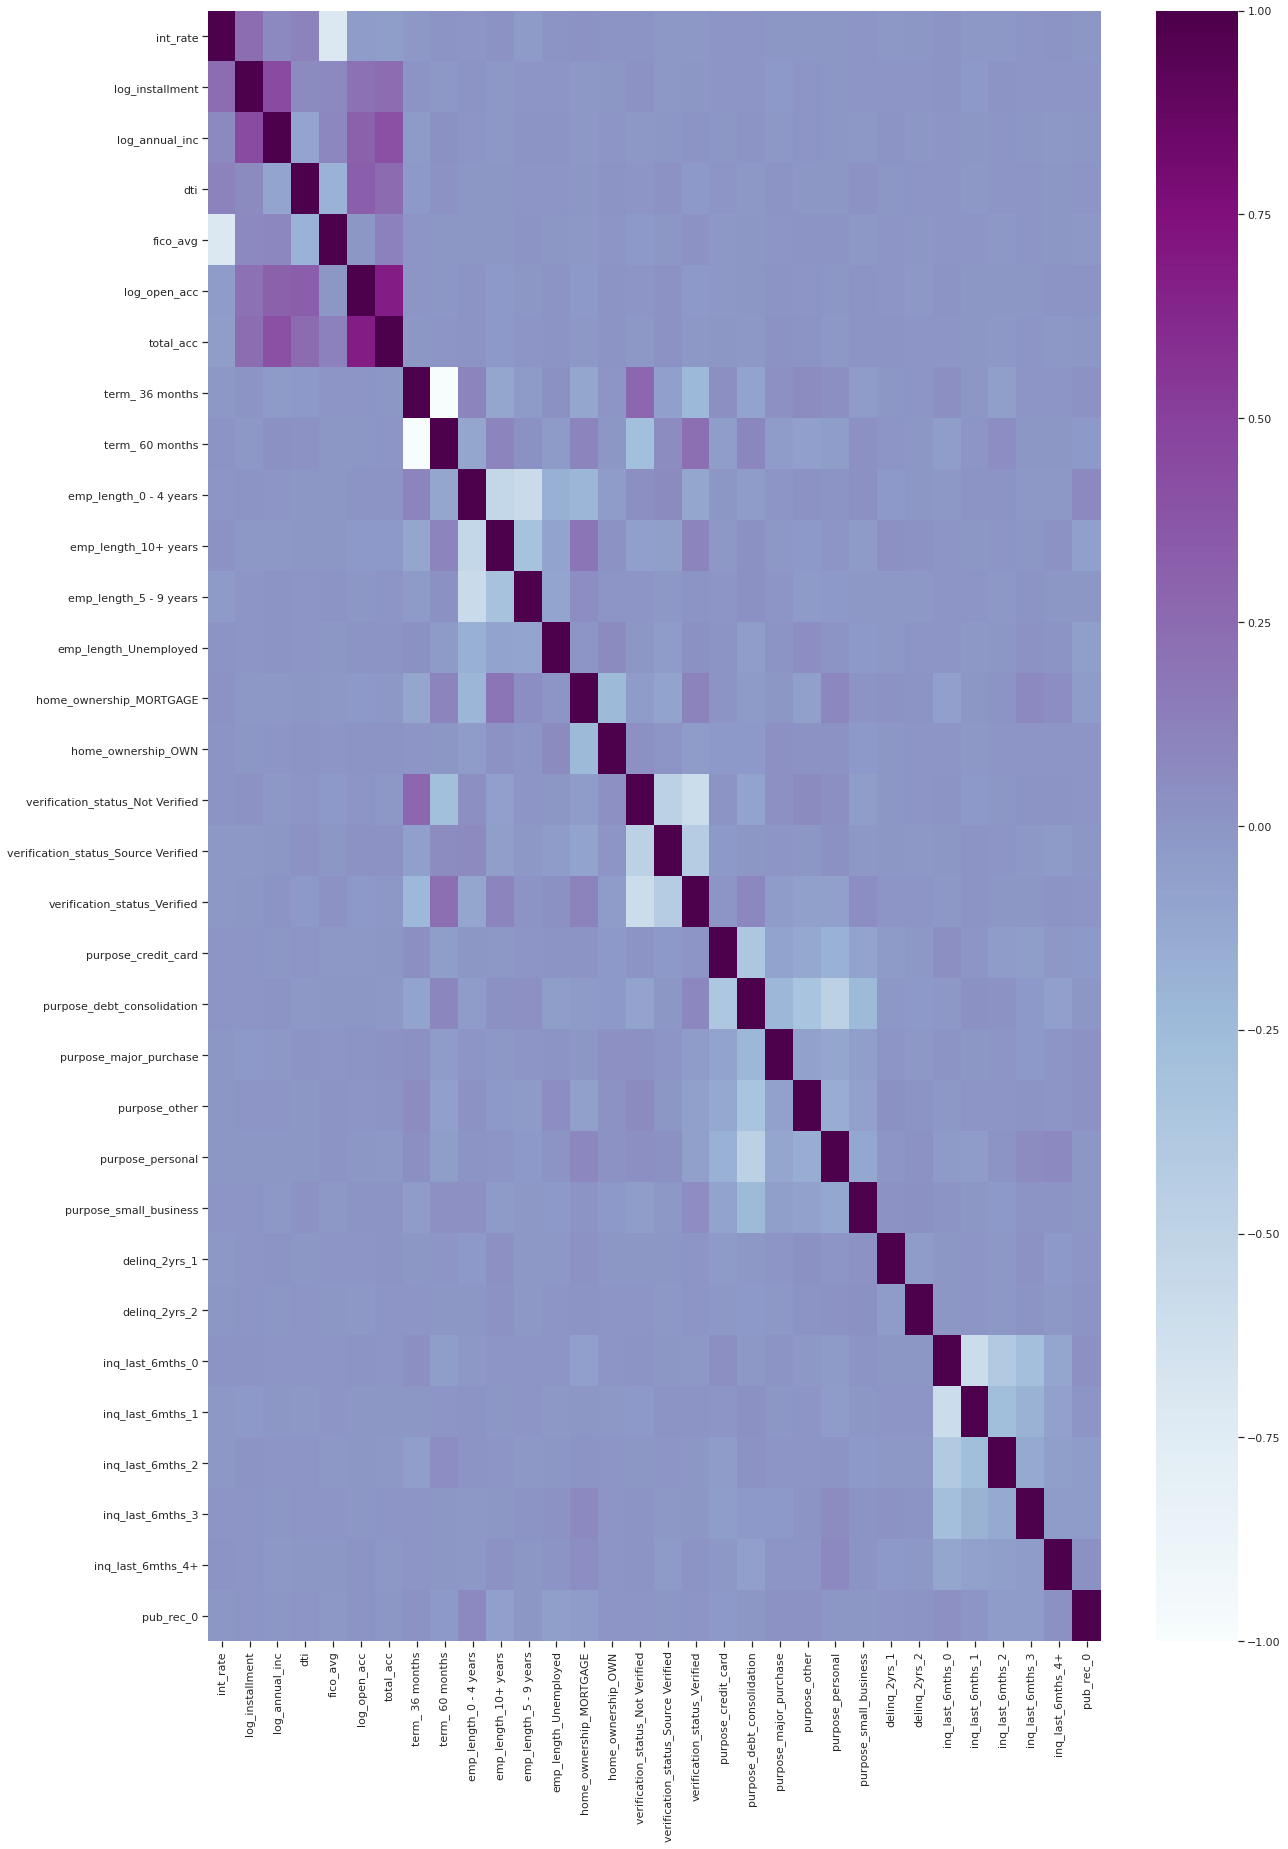

In [55]:
# Check correlation map
plt.figure(figsize = (20,30))
g = sns.heatmap(X_train_final.corr(), cmap = 'BuPu')

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [58]:
def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 32))
    
    
    # Second layer
    classifier.add(Dense(units= 8 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    classifier.add(Dense(units= 4, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

model = create_baseline()
print(model.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 710
Trainable params: 710
Non-trainable params: 0
_________________________________________________________________
None


Four layered deep neural network model. First layer 16 neurons, seocnd 8, thirsd 4 and final is 2 for output.

Such a deep neural network is not necessary for this problem butit is built for practice.

In [59]:
# It is necessary to convert targets to categorical

from tensorflow.keras.utils import to_categorical
y_train1 = to_categorical(y_train1)
y_valid1 =to_categorical(y_valid1)
y_test = to_categorical(y_test)

In [60]:

# history = model.fit(X_train_final, y_train, validation_split=0.2, epochs = 50,  batch_size = 32, verbose = 2)         This would have automatically selected first 80% of training data as training and last 20% as validation. Bias introduced

history = model.fit(X_train_final ,y_train1, validation_data = (X_valid_final, y_valid1), epochs = 50,  batch_size = 32, verbose = 2)

Epoch 1/50
1189/1189 - 14s - loss: 0.6775 - accuracy: 0.5705 - val_loss: 0.6884 - val_accuracy: 0.6569
Epoch 2/50
1189/1189 - 1s - loss: 0.6600 - accuracy: 0.6113 - val_loss: 0.6638 - val_accuracy: 0.6314
Epoch 3/50
1189/1189 - 1s - loss: 0.6535 - accuracy: 0.6189 - val_loss: 0.6241 - val_accuracy: 0.6601
Epoch 4/50
1189/1189 - 1s - loss: 0.6492 - accuracy: 0.6230 - val_loss: 0.6773 - val_accuracy: 0.5928
Epoch 5/50
1189/1189 - 1s - loss: 0.6443 - accuracy: 0.6295 - val_loss: 0.6390 - val_accuracy: 0.6446
Epoch 6/50
1189/1189 - 1s - loss: 0.6406 - accuracy: 0.6342 - val_loss: 0.6533 - val_accuracy: 0.6257
Epoch 7/50
1189/1189 - 1s - loss: 0.6364 - accuracy: 0.6386 - val_loss: 0.6722 - val_accuracy: 0.6095
Epoch 8/50
1189/1189 - 1s - loss: 0.6329 - accuracy: 0.6438 - val_loss: 0.6220 - val_accuracy: 0.6604
Epoch 9/50
1189/1189 - 1s - loss: 0.6291 - accuracy: 0.6490 - val_loss: 0.6535 - val_accuracy: 0.6311
Epoch 10/50
1189/1189 - 1s - loss: 0.6259 - accuracy: 0.6515 - val_loss: 0.6550 -

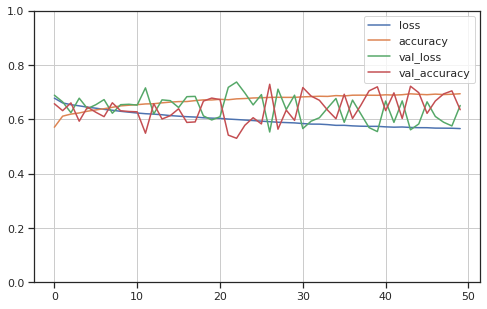

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
predicted_test = model.predict_classes(X_test_final)      # Predict_classes identifies classes instead of prbability
predicted_test


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 0, ..., 1, 0, 0])

In [63]:
# Confusion matrix


# But first, convert y_test to finite values as it currently isn't finite


rounded_labels= np.argmax(y_test, axis = 1)
rounded_labels
# 2


from sklearn.metrics import confusion_matrix
confusion_matrix(rounded_labels, predicted_test)





array([[6800, 3311],
       [ 800,  687]])

https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel/54595455

The initial testing data had been a one hot encoded vector, it first needs to be converted to a single digit array. To do this, use np.argmax()


Note, for results with multiple classes, (multilabel_confusion_matrix) can be used


In [64]:
# For all details of modelling, classification_report

from sklearn.metrics import classification_report
print(classification_report(rounded_labels, predicted_test))


              precision    recall  f1-score   support

           0       0.89      0.67      0.77     10111
           1       0.17      0.46      0.25      1487

    accuracy                           0.65     11598
   macro avg       0.53      0.57      0.51     11598
weighted avg       0.80      0.65      0.70     11598



In [65]:
# For model explainability, build global surrogate model

train_predicted = model.predict_classes(X_train_final)      # Predict_classes identifies classes instead of prbability



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66640 sha256=a0b80ef01162888147607fe97c0994da8e0291a426f53de1dae4e34a426642fc
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


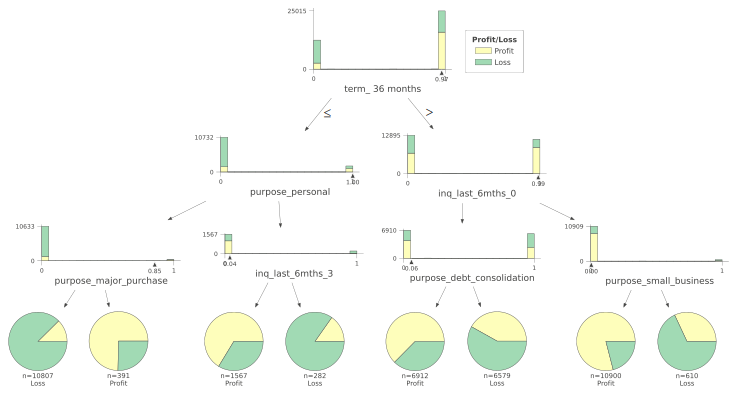

In [66]:

# Building of a global surogate model. Model used is a decision tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_final,train_predicted)

feature_cols = X_train_final.columns


# First type of decision trees
!pip install dtreeviz
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

viz = dtreeviz(clf, X_train_final, train_predicted,
                target_name="Profit/Loss",
                feature_names=feature_cols,
                class_names=['Profit', 'Loss'])

viz



# documentation

dtreeviz documentation https://github.com/parrt/dtreeviz 

https://stackoverflow.com/questions/53161047/visualise-a-decision-tree-in-colaboratory


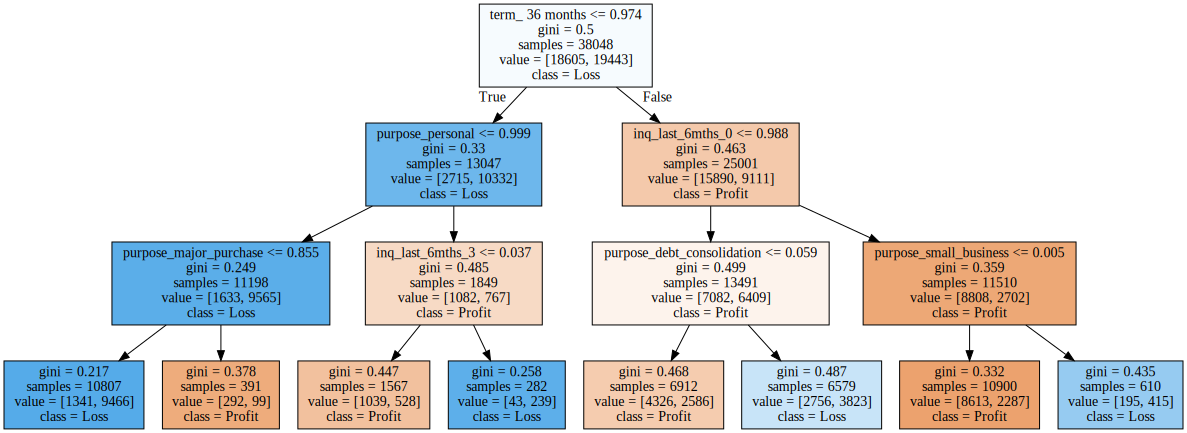

In [67]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz


# Basic and simple decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,
                                class_names=['Profit', 'Loss'],                                   # 1 is a loss and 0 is a profit
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph




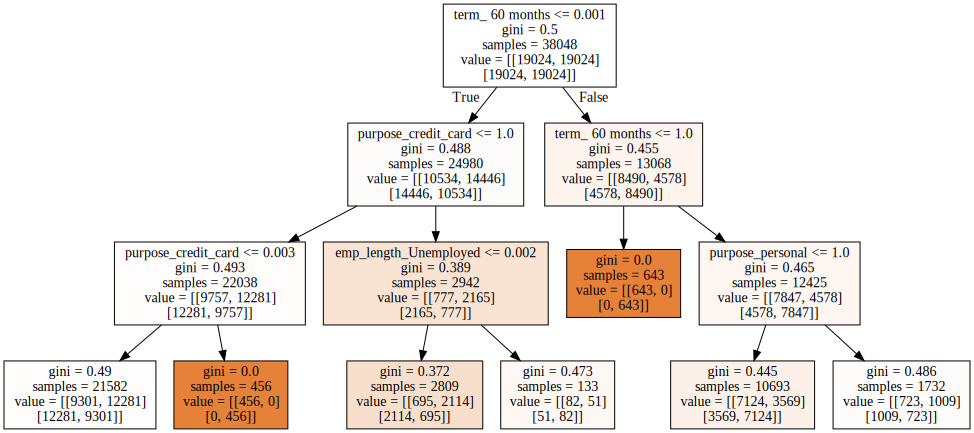

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_final,y_train1)

feature_cols = X_train_final.columns

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,
                                class_names=['Profit', 'Loss'],                                   # 1 is a loss and 0 is a profit
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph